Importerar rätt Bibliotek


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Läser in data som vi behöver för vår ML modell


In [7]:
cars_data = pd.read_csv("car_price_dataset.csv", sep=";") 

Delar upp datan i X oxh y, Träning och Test, med procentuell uppdelning 80 och 20% inför framtida K-delad Korsvalidering

In [8]:
X = cars_data.drop(columns="Price")
y = cars_data["Price"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

Nedan skapar vi en dataframe för EDA

In [10]:
df_train = X_train.copy()
df_train["Price"] = y_train

In [11]:
df_train.head()


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
9254,Volkswagen,Golf,2007,3.2,Hybrid,Semi-Automatic,33948,5,4,9721
1561,BMW,5 Series,2010,4.8,Electric,Semi-Automatic,224853,2,1,9402
1670,Hyundai,Sonata,2006,1.9,Hybrid,Semi-Automatic,13435,3,5,8531
6087,Honda,CR-V,2019,1.7,Diesel,Semi-Automatic,199846,2,3,7503
6669,Mercedes,E-Class,2005,3.6,Petrol,Automatic,261,3,2,10694


In [12]:
df_train.groupby("Brand")["Model"].value_counts()

Brand       Model   
Audi        A4          288
            Q5          286
            A3          277
BMW         3 Series    273
            5 Series    273
            X5          242
Chevrolet   Impala      284
            Malibu      268
            Equinox     247
Ford        Fiesta      300
            Explorer    263
            Focus       263
Honda       Accord      302
            Civic       258
            CR-V        247
Hyundai     Elantra     282
            Sonata      274
            Tucson      262
Kia         Optima      277
            Rio         257
            Sportage    238
Mercedes    GLA         253
            E-Class     249
            C-Class     234
Toyota      Corolla     265
            Camry       256
            RAV4        254
Volkswagen  Tiguan      293
            Passat      272
            Golf        263
Name: count, dtype: int64

In [13]:
df_train.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,2011.520375,2.996887,149477.003250,3.503625,2.991875,8828.745250
std,6.897792,1.153237,86613.284937,1.111482,1.420849,3132.164285
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.000000
25%,2006.000000,2.000000,74192.250000,3.000000,2.000000,6604.750000
50%,2012.000000,3.000000,150069.500000,4.000000,3.000000,8829.000000
75%,2017.000000,4.000000,224292.750000,4.000000,4.000000,11071.000000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.000000


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         8000 non-null   object 
 1   Model         8000 non-null   object 
 2   Year          8000 non-null   int64  
 3   Engine_Size   8000 non-null   float64
 4   Fuel_Type     8000 non-null   object 
 5   Transmission  8000 non-null   object 
 6   Mileage       8000 non-null   int64  
 7   Doors         8000 non-null   int64  
 8   Owner_Count   8000 non-null   int64  
 9   Price         8000 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 687.5+ KB


Feature Engineering och preprocessing

Efter genomförd explorativ dataanalys har följande beslut fattats gällande preprocessing och feature engineering:

Vi har noterat att datan är väldigt jämt fördelad och det finns inga nullvärden.

Brand
Kategorisk variabel som kodas (encoding).

Model
Kategorisk variabel som kodas (encoding).

Year → Car_Age
Variabeln Year transformeras till bilens ålder (Car_Age).
Då problemet är ett regressionsproblem bedömdes det som mer lämpligt att bevara ordnings- och avståndsinformation snarare än att kategorisera årtal.
Spannet i datan sträcker sig från år 2000 och framåt, och datasetet innehåller inga extremfall såsom veteranbilar med avvikande prisstruktur. Transformation till ålder bedöms därför ge ett mer intuitivt och stabilt samband med målvariabeln (Price).

Fuel_Type
Kategorisk variabel som kodas (encoding).

Transmission
Kategorisk variabel som kodas (encoding).

Numeriska variabler
Samtliga övriga numeriska variabler, exklusive målvariabeln (Price), skalas.
Detta görs för att säkerställa att variabler med olika numeriska skalor inte får oproportionerligt stort inflytande i modellen.

All preprocessing genomförs inom en pipeline för att säkerställa korrekt hantering vid korsvalidering och för att undvika dataläckage.

Vi kollar korrelation för att hitta likheter i våra features

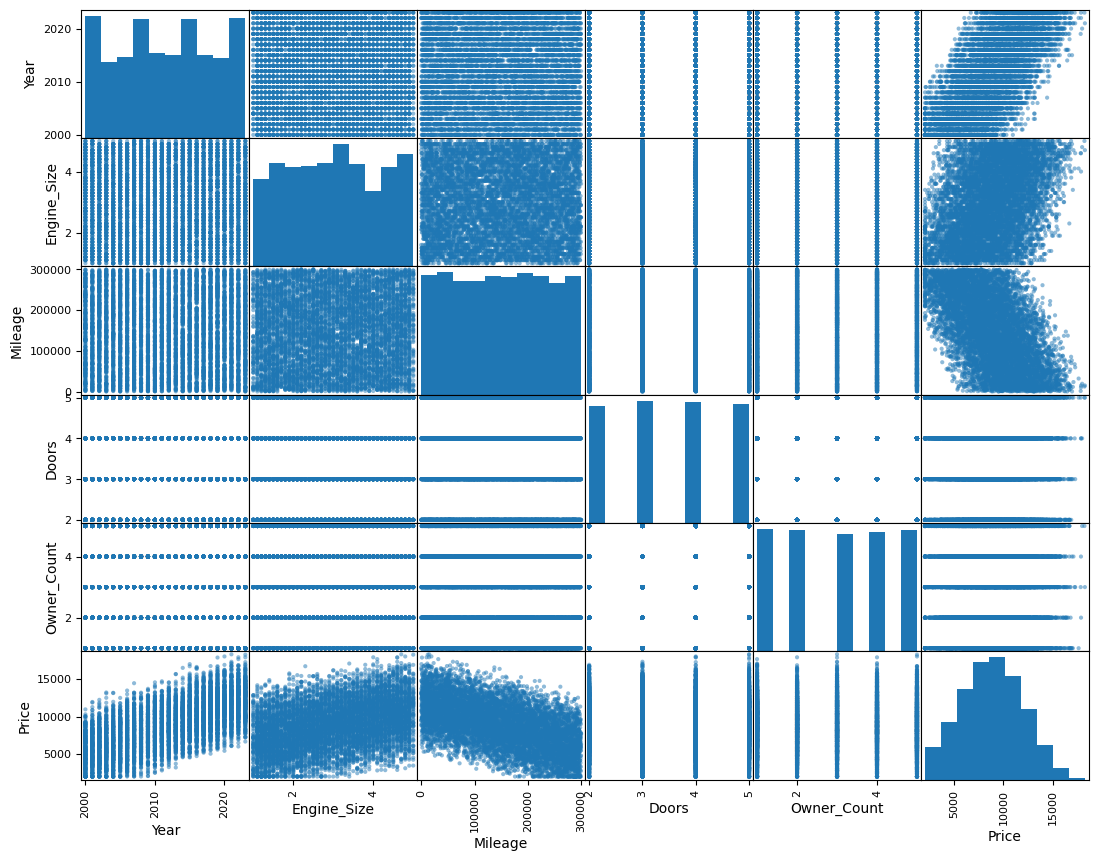

In [15]:
pd.plotting.scatter_matrix(df_train, figsize=(13, 10))
plt.show()

Vi ser att sambandet är linjärt, datan är också jämnfördelad. Vi pratar om att en SVR modell kan vara intressant. 

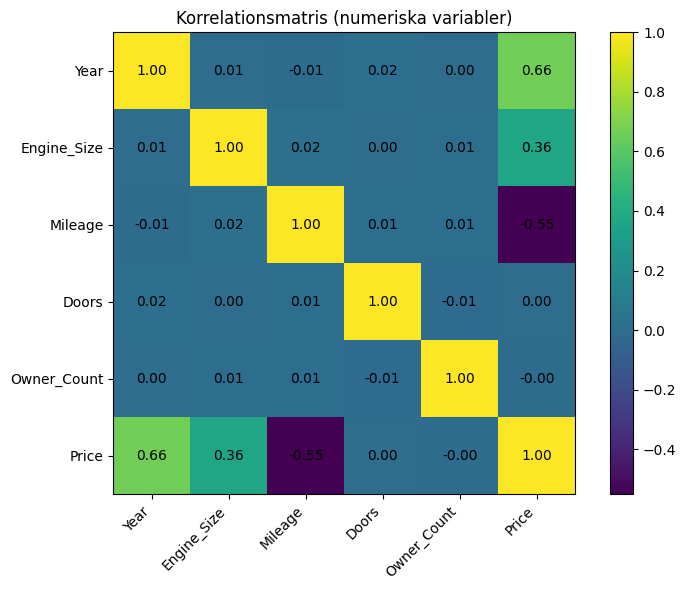

In [16]:
num_cols = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count", "Price"]
corr = df_train[num_cols].corr()

fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.imshow(corr.values)
plt.colorbar(cax)
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.xticks(rotation=45, ha="right")

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(
            j, i,
            f"{corr.iloc[i, j]:.2f}",
            ha="center", va="center", color="black"
        )

ax.set_title("Korrelationsmatris (numeriska variabler)")
plt.tight_layout()

plt.show()

Vi noterar att Doors och Owner_Count inte tillför mycket till en linjär modell. Men vi väljer att ha kvar dem pga att vi redan har ett litet dataset. Och vi är öppna för att det kanske kan tillföra något.

Vi ser också att år, mileage och sedan engine_Size gör störst påverkan.



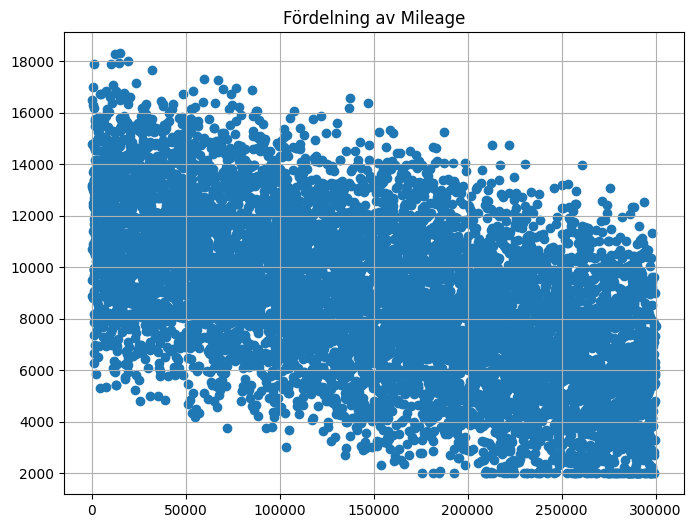

In [17]:


plt.figure(figsize=(8,6))
plt.scatter(df_train["Mileage"], df_train["Price"])
plt.title('Fördelning av Mileage')
plt.grid(True)

Vi ska bara börja kolla på en helt vanlig linjär modell innan vi gör någon modellering. och fortsatt jämförelse, för att ser hur modellen hanterar nuvarande data. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from datetime import datetime 


# Delar upp datan enligt uppdelning vi bestämde i EDA:n För att sedan "bearbeta" i Piplines 
num_features = ["Mileage", "Engine_Size", "Year"]
cat_features = ["Fuel_Type", "Model", "Transmission"]
# year_features = ["Year"]

X_train_0 = X_train[num_features + cat_features]


# # Skapar en variabel som ger oss vilket år det är idag.
# current_year = datetime.now().year

# # Gör en funktion som gör om året till antal år i ålder
# def year_to_age(x):
#     return (current_year - x).astype(int)


# Skapar 3st Piplines som transformerar datan - Numeric normaliserar all data, Categorical encodar och year gör om till ålder
numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

# year_transformer = Pipeline([
#     ("to_age", FunctionTransformer(year_to_age)),
#     ("scaler", StandardScaler())
# ])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
        # ("year", year_transformer, year_features)
    ]
)



In [29]:
model_0 = LinearRegression()

pipeline = Pipeline([ 
    ("preprocess", preprocessor),
    ("model", model_0)
])

# Nedan gör vi en K-delad korsvalidering
cv = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
cv_scores = cross_validate(
    pipeline,
    X_train_0,
    y_train,
    cv=cv,
    scoring="neg_root_mean_squared_error"
)

print(cv_scores)
print("Mean RMSE:", -cv_scores["test_score"].mean())

RMSE_model0 = cv_scores["test_score"].mean()

# Vår modell beräknar i snitt fel på 87 dollar

{'fit_time': array([0.01619077, 0.01049089, 0.01095605, 0.00925684, 0.00920391]), 'score_time': array([0.00365019, 0.00357199, 0.00274372, 0.002635  , 0.00272274]), 'test_score': array([ -63.58900775, -105.09365655, -128.94871054,  -71.56392346,
        -65.76751767])}
Mean RMSE: 86.99256319180917


Vi kollar här nedan på en Random Forest Regressor. 

In [ ]:
# Random Forest 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_1 = RandomForestRegressor(random_state=42)

# skapar en variabel för dem hyperparametrar vi vill testa
hyperparams = {"model__n_estimators": [10, 50, 100, 150],
               "model__max_depth": [None, 2, 3, 5, 10],
               "model__min_samples_split": [2, 5, 10]}


pipeline = Pipeline([ 
    ("preprocess", preprocessor),
    ("model", model_1)
])

# Nedan gör vi en K-delad korsvalidering
cv = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
# 
grid = GridSearchCV(
    pipeline,
    param_grid = hyperparams,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1
)

grid.fit(X_train_0, y_train)

best_model_1 = grid.best_estimator_
RMSE_model1 = -grid.best_score_


print(grid.best_params_)
print("Mean RMSE:", -grid.best_score_)



{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 150}
Mean RMSE: 584.8335326908026


Vi ser att vi skulle kunna fortsätta utvärdera hyperparametrar genom att testa andra kombinationer vid ytterparametrarna som visade sig vara bäst. Men modellen är redan så pass mycket sämre än den linjära att vi inte anser det värt att fortsätta utvärdera.

Vi kollar på dem fem bästa kombinationer av hyperparametrar och jämför tiden samt scoring för lärandets skull. 

In [21]:
results = pd.DataFrame(grid.cv_results_)


results.sort_values(by="rank_test_score", ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,21.016083,0.388394,0.104885,0.017801,None,2,150,"{'model__max_depth': None, 'model__min_samples...",-600.280954,-580.655517,-576.966549,-591.714447,-574.550197,-584.833533,9.706308,1
2,15.285187,0.764977,0.098633,0.024444,None,2,100,"{'model__max_depth': None, 'model__min_samples...",-601.781043,-582.593233,-578.987131,-594.462238,-576.917837,-586.948296,9.585682,2
7,13.006792,0.221619,0.119534,0.054380,None,5,150,"{'model__max_depth': None, 'model__min_samples...",-607.623286,-589.189351,-583.459177,-596.492650,-581.745456,-591.701984,9.485020,3
6,8.435989,0.304051,0.065614,0.008770,None,5,100,"{'model__max_depth': None, 'model__min_samples...",-609.449766,-590.287500,-586.136589,-600.140041,-583.146930,-593.832165,9.691847,4
1,8.177860,0.271369,0.053267,0.006946,None,2,50,"{'model__max_depth': None, 'model__min_samples...",-605.829775,-591.876100,-584.602876,-603.546147,-591.193750,-595.409729,8.022814,5


In [ ]:
#SVR 

from sklearn.svm import LinearSVR, SVR

model_2 = SVR()

pipeline = Pipeline([ 
    ("preprocess", preprocessor),
    ("scale", StandardScaler(with_mean=False)),
    ("model", model_2)
    ])

hyperparams = {
               "model__C": [0.1, 1.0, 10, 100],
               "model__epsilon": [4.0, 5.0, 6.0],
               "model__kernel" : ["linear", "rbf"],
               "model__gamma": ["scale", 0.01, 0.1, 1]
               }

# Nedan gör vi en K-delad korsvalidering
cv = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
# 
grid = GridSearchCV(
    pipeline,
    param_grid = hyperparams,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Här tränar vi modellen
grid.fit(X_train_0, y_train)

best_model_2 = grid.best_estimator_
RMSE_model2 = -grid.best_score_


print(grid.best_params_)
print("Mean RMSE:", -grid.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'model__C': 1.0, 'model__epsilon': 6.0, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Mean RMSE: 87.3289364639957


Efter justering av hyperparametrar får vi inte bättre resultat än vår initiala linjära modell. Därför fortsätter vi inte undersöka SVR mer. 

Provar med att göra en lasso och se vad vi får för resultat

In [36]:
# Lasso

from sklearn.linear_model import Lasso

model_3 = Lasso()

pipeline = Pipeline([ 
    ("preprocess", preprocessor),
    ("model", model_3)
    ])

hyperparams = {
               "model__alpha": [0.25, 0.3, 0.4, 0.5],
               }

# Nedan gör vi en K-delad korsvalidering
cv = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
# 
grid = GridSearchCV(
    pipeline,
    param_grid = hyperparams,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Här tränar vi modellen
grid.fit(X_train_0, y_train)

best_model_3 = grid.best_estimator_
RMSE_model3 = -grid.best_score_


print(grid.best_params_)
print("Mean RMSE:", -grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'model__alpha': 0.25}
Mean RMSE: 86.85472832812255


Vi provade alpha värden i 3 körningar med värden mellan 0.01 - 10 och landade till slut på 0.25 som det bästa alternativet

Vi jämför de modeller som vi har testat

Vi provar med att göra en ny linear regression

In [38]:
# LinearRegression

model_4 = LinearRegression()

pipeline = Pipeline([ 
    ("preprocess", preprocessor),
    ("model", model_4)
    ])

hyperparams = {
               "model__fit_intercept": [True, False],
               "model__positive": [True, False]
               }

# Nedan gör vi en K-delad korsvalidering
cv = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
# 
grid = GridSearchCV(
    pipeline,
    param_grid = hyperparams,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Här tränar vi modellen
grid.fit(X_train_0, y_train)

best_model_4 = grid.best_estimator_
RMSE_model4 = -grid.best_score_


print(grid.best_params_)
print("Mean RMSE:", -grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'model__fit_intercept': True, 'model__positive': False}
Mean RMSE: 86.99256319180917


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "

In [34]:
print(RMSE_model0)
print(RMSE_model1)
print(RMSE_model2)
print(RMSE_model3)

-86.99256319180917


NameError: name 'RMSE_model1' is not defined